### Placement Assignment Deep Learning 

#### Question 1 - Implement 3 different CNN architectures with a comparison table for the MNSIT dataset using the Tensorflow library.
Note -    
  1. The model parameters for each architecture should not be more than 8000 parameters
  2. Code comments should be given for proper code understanding.
  3. The minimum accuracy for each accuracy should be at least 96%

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [13]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


In [14]:
train_data[0].shape, train_labels.shape, train_data.shape, test_data.shape

((28, 28), (60000,), (60000, 28, 28), (10000, 28, 28))

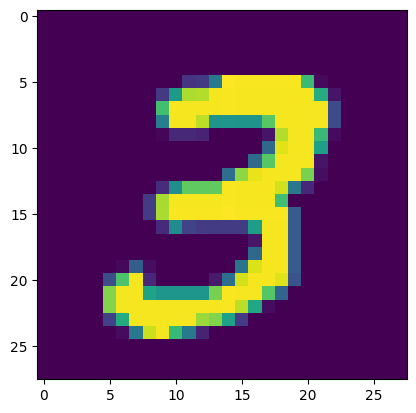

In [15]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [16]:
train_labels[7]

3

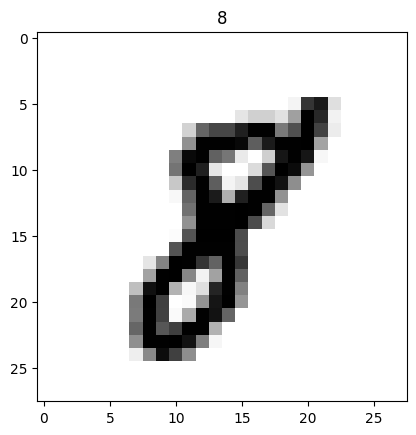

In [17]:
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(train_labels[17]);

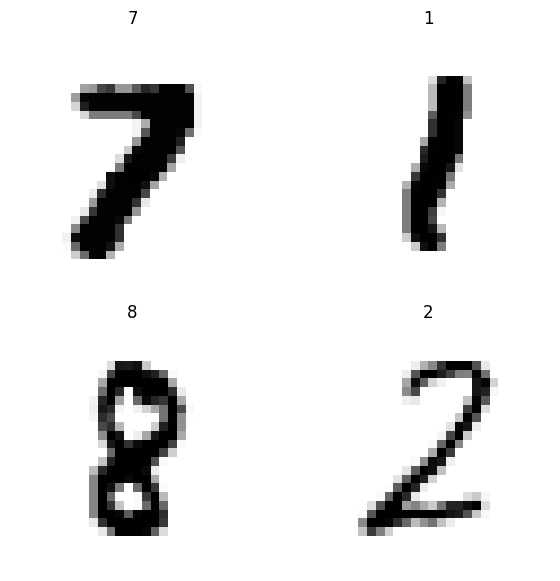

In [18]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False)

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
model_1_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2624 - accuracy: 0.2395 - val_loss: 1.8139 - val_accuracy: 0.2951
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7246 - accuracy: 0.3225 - val_loss: 1.6114 - val_accuracy: 0.3526
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5260 - accuracy: 0.3898 - val_loss: 1.4571 - val_accuracy: 0.4143
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4279 - accuracy: 0.4287 - val_loss: 1.3345 - val_accuracy: 0.4786
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2488 - accuracy: 0.5136 - val_loss: 1.1552 - val_accuracy: 0.5458
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1616 - accuracy: 0.5408 - val_loss: 1.1346 - val_accuracy: 0.5327
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1276 - accuracy: 0.5486 - val_loss: 1.1124 - val_accuracy:

In [20]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [22]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [34]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
model_2_history = model_2.fit(train_data,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1145 - accuracy: 0.6112 - val_loss: 0.6558 - val_accuracy: 0.7954
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6267 - accuracy: 0.8061 - val_loss: 0.5965 - val_accuracy: 0.8177
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5728 - accuracy: 0.8236 - val_loss: 0.5488 - val_accuracy: 0.8314
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5442 - accuracy: 0.8342 - val_loss: 0.5312 - val_accuracy: 0.8397
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5266 - accuracy: 0.8403 - val_loss: 0.5157 - val_accuracy: 0.8430
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5121 - accuracy: 0.8469 - val_loss: 0.5146 - val_accuracy: 0.8457
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5020 - accuracy: 0.8494 - val_loss: 0.5064 - val_accuracy:

In [35]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
model_3_history = model_3.fit(train_data,
                       train_labels,
                       epochs=25,
                       validation_data=(test_data, test_labels))

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5057 - accuracy: 0.8522 - val_loss: 0.3215 - val_accuracy: 0.9082
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2998 - accuracy: 0.9131 - val_loss: 0.2945 - val_accuracy: 0.9160
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9203 - val_loss: 0.2665 - val_accuracy: 0.9248
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2593 - accuracy: 0.9254 - val_loss: 0.2659 - val_accuracy: 0.9249
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9283 - val_loss: 0.2633 - val_accuracy: 0.9287
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2409 - accuracy: 0.9304 - val_loss: 0.2651 - val_accuracy: 0.9250
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2357 - accuracy: 0.9316 - val_loss: 0.2594 - val_accuracy:

In [37]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 8)                 6280      
                                                                 
 dense_22 (Dense)            (None, 16)                144       
                                                                 
 dense_23 (Dense)            (None, 10)                170       
                                                                 
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
model_4_history = model_4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4918 - accuracy: 0.8555 - val_loss: 0.2802 - val_accuracy: 0.9189
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2546 - accuracy: 0.9267 - val_loss: 0.2330 - val_accuracy: 0.9335
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2070 - accuracy: 0.9408 - val_loss: 0.1908 - val_accuracy: 0.9417
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1810 - accuracy: 0.9477 - val_loss: 0.1810 - val_accuracy: 0.9446
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1645 - accuracy: 0.9515 - val_loss: 0.1799 - val_accuracy: 0.9478
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1511 - accuracy: 0.9557 - val_loss: 0.1560 - val_accuracy: 0.9542
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1420 - accuracy: 0.9585 - val_loss: 0.1546 - val_accuracy:

In [28]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 16)                12560     
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
model_5_history = model_5.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4007 - accuracy: 0.8828 - val_loss: 0.2481 - val_accuracy: 0.9268
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2266 - accuracy: 0.9330 - val_loss: 0.2053 - val_accuracy: 0.9398
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1888 - accuracy: 0.9440 - val_loss: 0.1719 - val_accuracy: 0.9479
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1679 - accuracy: 0.9501 - val_loss: 0.1673 - val_accuracy: 0.9490
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1536 - accuracy: 0.9547 - val_loss: 0.1656 - val_accuracy: 0.9515
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1426 - accuracy: 0.9572 - val_loss: 0.1545 - val_accuracy: 0.9545
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1339 - accuracy: 0.9600 - val_loss: 0.1543 - val_accuracy:

In [30]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 16)                12560     
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Make predictions with the most recent model
y_probs = model_5.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[2.3009349e-08, 2.0480458e-10, 6.0785652e-07, 9.5046407e-06,
        3.5604231e-11, 1.0550890e-09, 5.1809170e-19, 9.9998748e-01,
        2.6567887e-08, 2.3941689e-06],
       [6.0869877e-12, 3.7325021e-06, 9.9970192e-01, 2.9395148e-04,
        1.3191511e-15, 3.0958997e-08, 1.4961380e-07, 1.6995930e-12,
        1.3819290e-07, 2.9742078e-13],
       [1.3414324e-07, 9.9937016e-01, 7.6147720e-05, 5.2123046e-06,
        2.9729676e-06, 2.9820669e-07, 2.3388920e-06, 3.1237508e-04,
        2.3022181e-04, 2.2185667e-07],
       [9.9711967e-01, 2.9821340e-08, 1.1540242e-03, 4.2255843e-04,
        2.2589183e-10, 1.2329408e-04, 1.3814827e-08, 5.2755367e-04,
        1.3129331e-06, 6.5148814e-04],
       [4.6197747e-06, 8.8364523e-08, 3.5553927e-05, 1.1527956e-06,
        9.9627727e-01, 1.1706492e-06, 2.1810067e-07, 5.2824830e-06,
        1.0495118e-05, 3.6641012e-03]], dtype=float32)

In [32]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), y_probs[0].argmax()

(7, 7)

In [33]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])